In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"c:\Users\asus\OneDrive\Desktop\heart_disease_proj\heart.csv")


# Task 2: Model Building & Evaluation

## Data Preprocessing

I checked if there are any Nan values and where are they located. Then, I filled the cells containing the Nan values with the mode value(The most frequent value) 

In [114]:
number_of_Nan = df.isna().sum()
# print(number_of_Nan)
mode_Thal = df["Thal"].mode()[0]
df["Thal"]= df["Thal"].fillna(mode_Thal)

# for i in df["Thal"]:
#     print(i)

I checked for any duplicated rows and I found none

In [115]:
number_of_dups = df.duplicated().sum()
# print(number_of_dups)

I checked for the number of outliers and decided whether to keep these outliers or not. 

The number of outliers is 0
The number of outliers is 7
The number of outliers is 4
The number of outliers is 0
The number of outliers is 3
The number of outliers is 0
The number of outliers is 20


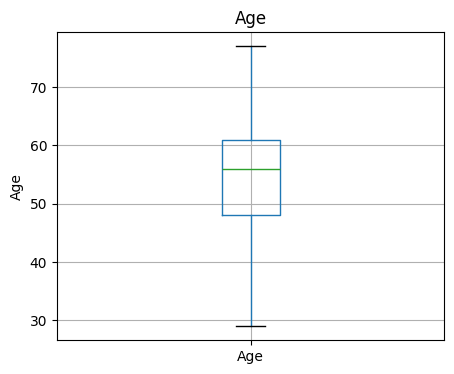

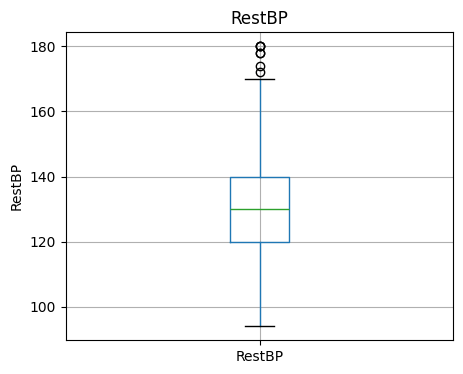

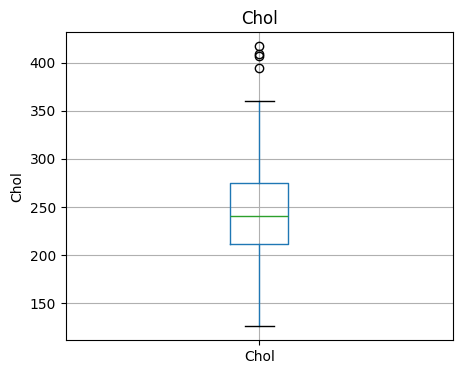

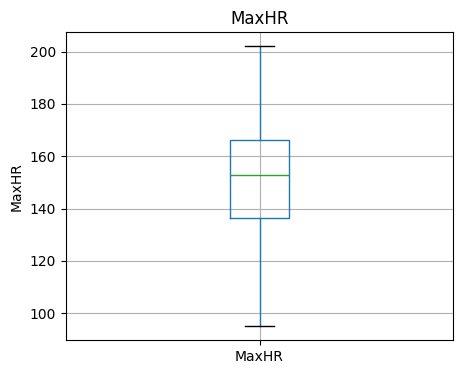

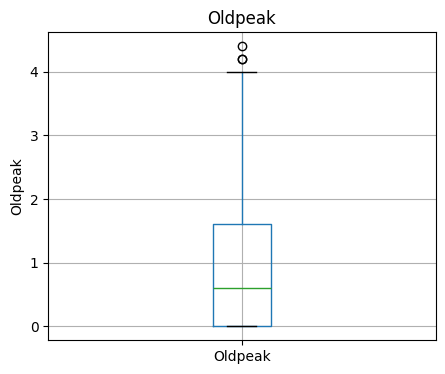

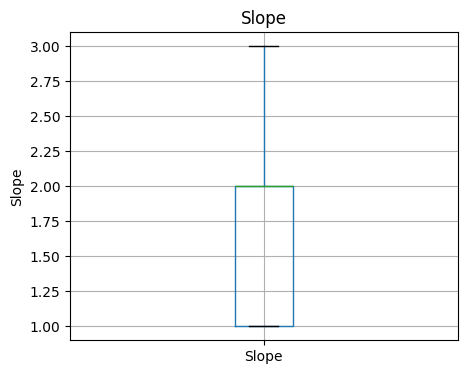

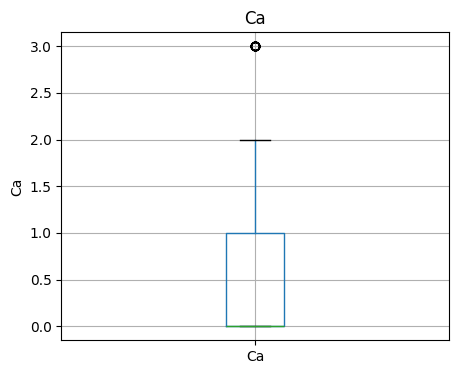

In [116]:
columns = ["Age", "RestBP" , "Chol", "MaxHR", "Oldpeak" , "Slope", "Ca"]

for col in columns:
    plt.figure(figsize = (5,4))
    df.boxplot(column= col)
    plt.title(f"{col}")
    plt.ylabel(col)
  

    # The code below is the new method that I used to identify the outliers after doing a research.
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    counter = 0
    for value in df[col]:
        
        if value > upper_limit or value < lower_limit:
            # print(value)
            counter +=1
        else: 
            pass
    print(f"The number of outliers is {counter}")

    df = df[df["RestBP"] < 190]
    df = df[df["Chol"] < 420]
    df = df[df["MaxHR"] >90]
    df = df[df["Oldpeak"] < 4.5]



        

### Handling Categorical Data 

Strategy A: Label Encoding

Strategy B: One-Hot Encoding

In [117]:
df_encoded = pd.get_dummies(df)





## Preparing for Training

###  The Train/Test Split

In [118]:
from sklearn.model_selection import train_test_split
y = df_encoded["Target"]
x  = df_encoded.drop("Target" , axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42, stratify = y ) 



### Scaling

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)




## Model Training and Evaluation

### Logistic Regression

ROC Score: 0.9230769230769231
Accuracy Score: 0.7796610169491526
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        33
           1       0.93      0.54      0.68        26

    accuracy                           0.78        59
   macro avg       0.83      0.75      0.76        59
weighted avg       0.82      0.78      0.77        59



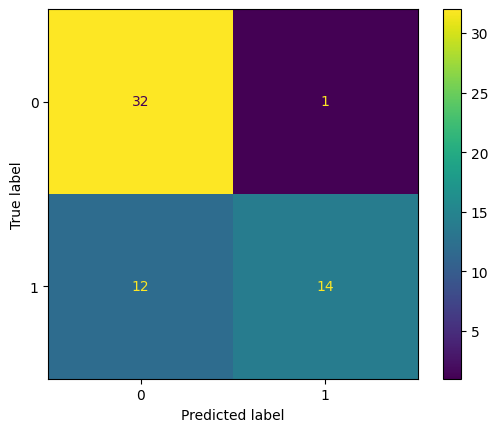

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay, confusion_matrix, roc_auc_score

lg_model = LogisticRegression(max_iter=1000)

lg_model.fit(x_train,y_train)
y_predict1 = lg_model.predict(x_test_scaled)
y_proba1 = lg_model.predict_proba(x_test_scaled)

accuracy1 = accuracy_score(y_test , y_predict1)
cp1 = classification_report(y_test, y_predict1)
y_proba_positive1 = y_proba1[:,1]
roc_score1 = roc_auc_score(y_test, y_proba_positive1)


cm1 = confusion_matrix(y_test, y_predict1) 
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()

print(f"ROC Score: {roc_score1}")
print(f"Accuracy Score: {accuracy1}")
print(cp1)


### Decision Tree

ROC Score: 0.729020979020979
Accuracy Score: 0.7288135593220338
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.68      0.73      0.70        26

    accuracy                           0.73        59
   macro avg       0.73      0.73      0.73        59
weighted avg       0.73      0.73      0.73        59



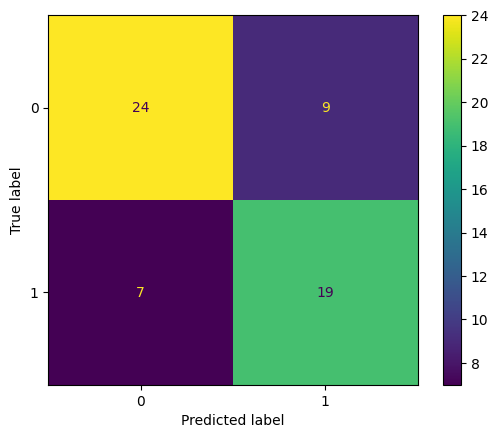

In [121]:
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train_scaled,y_train)

y_predict2 = dt_model.predict(x_test_scaled)
y_proba2 = dt_model.predict_proba(x_test_scaled)

accuracy2 = accuracy_score(y_test , y_predict2)
cp2 = classification_report(y_test, y_predict2)
y_proba_positive2 = y_proba2[:,1]
roc_score2 = roc_auc_score(y_test, y_proba_positive2)


cm2 = confusion_matrix(y_test, y_predict2) 
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()

print(f"ROC Score: {roc_score2}")
print(f"Accuracy Score: {accuracy2}")
print(cp2)

### Support Vector Machine (SVM)

ROC Score: 0.9289044289044288
Accuracy Score: 0.8813559322033898
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.85      0.88      0.87        26

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59



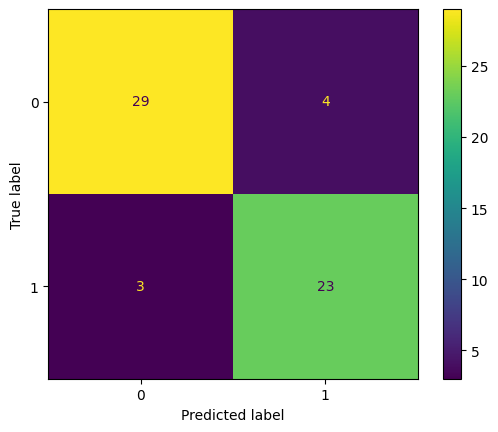

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel = "rbf", random_state=42, probability=True,max_iter=-1)

svm_model.fit(x_train_scaled,y_train)

y_predict3 = svm_model.predict(x_test_scaled)
y_proba3 = svm_model.predict_proba(x_test_scaled)

accuracy3 = accuracy_score(y_test , y_predict3)
cp3 = classification_report(y_test, y_predict3)
y_proba_positive3 = y_proba3[:,1]
roc_score3 = roc_auc_score(y_test, y_proba_positive3)


cm3 = confusion_matrix(y_test, y_predict3) 
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()

print(f"ROC Score: {roc_score3}")
print(f"Accuracy Score: {accuracy3}")
print(cp3)

### Random Forest Classifier

ROC Score: 0.9230769230769231
Accuracy Score: 0.847457627118644
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.84      0.81      0.82        26

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59



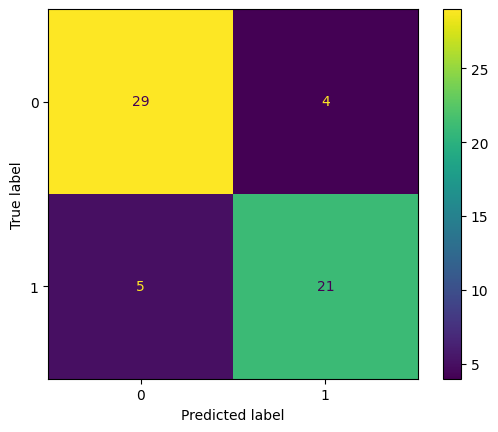

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state= 65,n_estimators=100)

rf_model.fit(x_train_scaled,y_train)

y_predict4 = rf_model.predict(x_test_scaled)
y_proba4 = rf_model.predict_proba(x_test_scaled)

accuracy4 = accuracy_score(y_test , y_predict4)
cp4 = classification_report(y_test, y_predict4)
y_proba_positive4 = y_proba4[:,1]
roc_score4 = roc_auc_score(y_test, y_proba_positive4)


cm4 = confusion_matrix(y_test, y_predict4) 
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp4.plot()

print(f"ROC Score: {roc_score4}")
print(f"Accuracy Score: {accuracy4}")
print(cp4)

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

svm_param_grid = {
    'C':[0.1,1,10,100],
    'gamma':['scale', 'auto',1,0.1,0.01,0.001],
    'kernel':['rbf', 'linear']
}

svm_grid = GridSearchCV(svm_model, svm_param_grid, refit = True, cv =10)

svm_grid.fit(x_train_scaled, y_train)

svm_best_params = svm_grid.best_params_
svm_best_score = svm_grid.best_score_

print(f"The best parameters are {svm_best_params}")
print(f"The best Cross-Validation score is {svm_best_score}")





The best parameters are {'C': 0.1, 'gamma': 'scale'}
The best Cross-Validation score is 0.8134057971014494


### Final Evaluation & Feature Importance

### Tuned SVM model

ROC Score: 0.9289044289044289
Accuracy Score: 0.847457627118644
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.84      0.81      0.82        26

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59

         Age       Sex    RestBP      Chol       Fbs   RestECG     MaxHR  \
0   0.394877 -1.509231  1.127911  0.707501  2.357023  1.041103  0.539069   
1   0.835497  0.662589 -0.167976 -0.786328  2.357023  1.041103 -0.459449   
2  -0.486362 -1.509231 -0.639208 -0.069290 -0.424264 -0.964613  0.539069   
3   0.064413 -1.509231  0.067640  1.882646 -0.424264 -0.964613  0.720617   
4  -0.045742 -1.509231  1.716951 -0.925752 -0.424264 -0.964613  0.584456   
5   2.377666 -1.509231  0.538872 -1.005423 -0.424264  0.038245 -1.548741   
6   0.394877 -1.509231  2.305991 -0.447727  2.357023  1.041103 -0.187126   
7

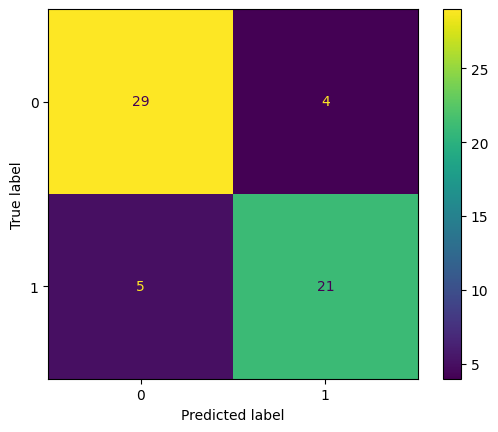

In [ ]:
svm_tuned_preditions = svm_grid.predict(x_test_scaled)
svm_tuned_probability = svm_grid.predict_proba(x_test_scaled)

cp5 = classification_report(y_test , svm_tuned_preditions)

accuracy5 = accuracy_score(y_test , svm_tuned_preditions)

y_proba_positive5 = svm_tuned_probability[: , 1]

roc_score5 = roc_auc_score(y_test, y_proba_positive5)

cm5 = confusion_matrix(y_test, svm_tuned_preditions) 
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5)
disp5.plot()

print(f"ROC Score: {roc_score5}")
print(f"Accuracy Score: {accuracy5}")
print(cp5)



 ### Final Evaluation & Feature Importance

                   Feature    Importance
10                      Ca  5.423729e-02
11  ChestPain_asymptomatic  2.372881e-02
12    ChestPain_nonanginal  1.694915e-02
7                    ExAng  1.016949e-02
15              Thal_fixed  0.000000e+00
8                  Oldpeak -2.220446e-17
14       ChestPain_typical -2.220446e-17
9                    Slope -3.330669e-17
6                    MaxHR -5.551115e-17
4                      Fbs -1.694915e-03
13    ChestPain_nontypical -3.389831e-03
17         Thal_reversable -5.084746e-03
1                      Sex -8.474576e-03
16             Thal_normal -8.474576e-03
3                     Chol -1.186441e-02
2                   RestBP -1.864407e-02
5                  RestECG -2.033898e-02
0                      Age -2.372881e-02


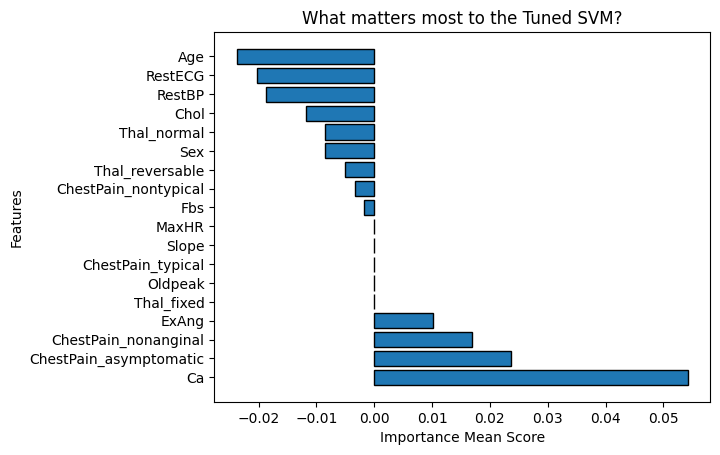

In [133]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(svm_grid.best_estimator_ , x_test_scaled, y_test, n_repeats=10, random_state=44)

importance_df = pd.DataFrame({'Feature':x_train_scaled.columns, 'Importance':perm_imp.importances_mean}).sort_values(by="Importance",ascending=False)

print(importance_df)

plt.barh(importance_df["Feature"],importance_df["Importance"],edgecolor = "black")
plt.xlabel("Importance Mean Score")
plt.ylabel("Features")
plt.title("What matters most to the Tuned SVM?")
plt.show()